In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics


%matplotlib inline
pd.options.display.max_columns = None

In [2]:
#load application data
application_data = pd.read_csv('application_data.csv')

#load previous application data
Previous_application_data = pd.read_csv('previous_application.csv')

In [3]:
application_data.shape

(307511, 122)

Application Data has 307511 rows and 122 columns.

In [4]:
Previous_application_data.shape

(1670214, 37)

Previous application data has 1670214 rows and 37 columns.

In [5]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
Previous_application_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


application data and previous application data can be merged using column 'SK_ID_CURR'.

In [7]:
application_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

From above result it can be seen that in application data there are multiple columns that has missing values.

In [8]:
Previous_application_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

From above result it can be seen that in previous application data there are multiple columns that has missing values.

In [9]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [10]:
Previous_application_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [11]:
application_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [12]:
Previous_application_data.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [13]:
#merging data
X = application_data.merge(Previous_application_data,on='SK_ID_CURR')

In [14]:
X.shape

(1413701, 158)

After merging data we have 1413701 rows and 158 columns. We can clearly say that ID's from application data have multiple previous application data

In [15]:
X.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartmen

In [16]:
X.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,476495.000000,1413701.0,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,616842.000000,1.411880e+06,1.171859e+06,701703.000000,589393.000000,729019.000000,476444.000000,428502.000000,664485.000000,706919.000000,715193.000000,457041.000000,576528.000000,449351.000000,709301.000000,434055.000000,638143.000000,701703.000000,589393.000000,729019.000000,476444.000000,428502.000000,664485.000000,706919.000000,715193.000000,457041.000000,576528.000000,449351.000000,709301.000000,434055.000000,638143.000000,701703.000000,589393.000000,729019.000000,476444.000000,428502.000000,664485.000000,706919.000000,715193.000000,457041.000000,576528.000000,449351.000000,709301.000000,434055.000000,638143.000000,736160.000000,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784813e+05,8.

In [17]:
X.dtypes.value_counts()

float64    80
int64      46
object     32
dtype: int64

In [18]:
#get numerical columns and categorical columns
columns = X.columns
numerical_columns = X._get_numeric_data().columns
categorical_columns = list(set(columns) - set(numerical_columns))

In [19]:
#get value counts of each category in categorical columns
for i in categorical_columns:
    print(X[i].value_counts(normalize = False))
    print('-'*40)

Cash loans         1307115
Revolving loans     106586
Name: NAME_CONTRACT_TYPE_x, dtype: int64
----------------------------------------
Secondary / secondary special    1037902
Higher education                  312845
Incomplete higher                  45211
Lower secondary                    17164
Academic degree                      579
Name: NAME_EDUCATION_TYPE, dtype: int64
----------------------------------------
Married                 910910
Single / not married    186657
Civil marriage          143157
Separated                91338
Widow                    81639
Name: NAME_FAMILY_STATUS, dtype: int64
----------------------------------------
House / apartment      1264952
With parents             61614
Municipal apartment      51533
Rented apartment         19785
Office apartment         11428
Co-op apartment           4389
Name: NAME_HOUSING_TYPE, dtype: int64
----------------------------------------
Business Entity Type 3    304889
XNA                       273583
Self-employe

XAP                                 786937
XNA                                 567351
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1042
Purchase of electronic equipment       934
Buying a new car                       886
Wedding / gift / holiday               801
Buying a home                          701
Car repairs                            691
Furniture                              660
Buying a holiday home / land           463
Business development                   359
Gasification / water supply            251
Buying a garage                        116
Hobby                                   45
Money for a

1) Columns NAME_CASH_LOAN_PURPOSE, NAME_PAYMENT_TYPE, NAME_PORTFOLIO, NAME_GOODS_CATEGORY, NAME_YIELD_GROUP, NAME_PRODUCT_TYPE, ORGANIZATION_TYPE, NAME_SELLER_INDUSTRY have more unknown 'XNA' values and removing these values might impact our analyis. Hence we do not remove rows from these columns. <br>
2) Columns NAME_CLIENT_TYPE, NAME_CONTRACT_TYPE_y, CODE_GENDER, CODE_REJECT_REASON have some unknown 'XNA' values. As number of rows with 'XNA' values are negligible compared to whole data set, we remove these rows.

In [20]:
X=X.drop(X.loc[X['CODE_GENDER']=='XNA'].index)
X=X.drop(X.loc[X['NAME_CONTRACT_TYPE_y']=='XNA'].index)
X=X.drop(X.loc[X['CODE_REJECT_REASON']=='XNA'].index)
X=X.drop(X.loc[X['NAME_CLIENT_TYPE']=='XNA'].index)

In [21]:
y = X['TARGET']

In [22]:
#remove columns with more than 30% missing values

#get columns_names and number of missing values
null_columns_temp = X.isnull().sum() 

#get column_names that has more than 30% missing values
null_columns = list(null_columns_temp[null_columns_temp.values>(0.3*len(X))].index)

#remove columns with more than 30% missing values
X.drop(labels=null_columns,axis=1,inplace=True)

print(X.shape)

(1407418, 97)


After removing columns that have more than 30% missing values we have 97 columns.

In [23]:
#remove highly correlated features
def correlation(dataset, threshold):
    correlated_features = set()  # Set of all the names of correlated columns
    correlated_matrix = dataset.corr()
    for i in range(len(correlated_matrix.columns)):
        for j in range(i):
            if abs(correlated_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                column_name = correlated_matrix.columns[i]  # getting the name of column
                correlated_features.add(column_name)
    return correlated_features

X_corr = X.drop(['TARGET'], axis = 1)
correlated_features = correlation(X_corr, 0.7)
X.drop(correlated_features,axis=1,inplace=True)
X.shape

(1407418, 85)

After removing columns that are highly correlated with each other we have 85 columns.

In [24]:
columns = X.columns
numerical_columns = X._get_numeric_data().columns
categorical_columns = list(set(columns) - set(numerical_columns))

In [25]:
#imputing categorical columns with mode values and numerical columns with median values
for i in X.columns:
    if i in categorical_columns:
        X[i].fillna(X[i].mode(), inplace = True)
    else:
        X[i].fillna(X[i].median(), inplace = True)

In [26]:
#encoding categorical variables
X_encoded = pd.get_dummies(X, prefix_sep='_', drop_first=True)

print(X_encoded.shape)
X_encoded.head()

(1407418, 268)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,NAME_CONTRACT_TYPE_x_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_x_Family,NAME_TYPE_SUITE_x_Group of people,NAME_TYPE_SUITE_x_Other_A,NAME_TYPE_SUITE_x_Other_B,"NAME_TYPE_SUITE_x_Spouse, partner",NAME_TYPE_SUITE_x_Unaccompanied,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_x_MONDAY,WEEKDAY_APPR_PROCESS_START_x_SATURDAY,WEEKDAY_APPR_PROCESS_START_x_SUNDAY,WEEKDAY_APPR_PROCESS_START_x_THURSDAY,WEEKDAY_APPR_PROCESS_START_x_TUESDAY,WEEKDAY_APPR_PROCESS_START_x_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_CONTRACT_TYPE_y_Consumer loans,NAME_C

In [27]:
#standardization using min_max scaler
min_max_scaler = preprocessing.MinMaxScaler()
X_standard = pd.DataFrame(min_max_scaler.fit_transform(X_encoded),columns=X_encoded.columns, index=X_encoded.index)
 
X_standard.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,NAME_CONTRACT_TYPE_x_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_x_Family,NAME_TYPE_SUITE_x_Group of people,NAME_TYPE_SUITE_x_Other_A,NAME_TYPE_SUITE_x_Other_B,"NAME_TYPE_SUITE_x_Spouse, partner",NAME_TYPE_SUITE_x_Unaccompanied,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_x_MONDAY,WEEKDAY_APPR_PROCESS_START_x_SATURDAY,WEEKDAY_APPR_PROCESS_START_x_SUNDAY,WEEKDAY_APPR_PROCESS_START_x_THURSDAY,WEEKDAY_APPR_PROCESS_START_x_TUESDAY,WEEKDAY_APPR_PROCESS_START_x_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_CONTRACT_TYPE_y_Consumer loans,NAME_C

In [28]:
feature_types = X_standard.apply(pd.Series.nunique, axis = 0)
Categorical_features = list(feature_types[feature_types.values <= 3].index)
numerical_features = list(feature_types[feature_types.values > 3].index)

In [29]:
print(len(Categorical_features))
print(len(numerical_features))

241
27


In [30]:
#ANOVA feature selection
X_numerical = X_standard[numerical_features]
k = int(0.9 * len(numerical_features))
anova_selector = SelectKBest(score_func=f_classif, k=k)
anova_selected = anova_selector.fit_transform(X_numerical, y)
anova_features = X_numerical.columns[anova_selector.get_support(indices=True)].tolist()

print(len(anova_features))
print(anova_features)

24
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START_x', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_PREV', 'AMT_ANNUITY_y', 'HOUR_APPR_PROCESS_START_y', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']


In [31]:
#Chi2 feature selection
X_categorical = X_standard[Categorical_features]
k = int(0.10 * len(Categorical_features))
chi2_selector = SelectKBest(score_func=chi2, k=k)
chi2_selected = chi2_selector.fit_transform(X_categorical, y)
chi2_features = X_categorical.columns[chi2_selector.get_support(indices=True)].tolist()

print(len(chi2_features))
print(chi2_features)

24
['TARGET', 'FLAG_WORK_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_6', 'NAME_CONTRACT_TYPE_x_Revolving loans', 'CODE_GENDER_M', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_With parents', 'ORGANIZATION_TYPE_Self-employed', 'ORGANIZATION_TYPE_XNA', 'NAME_CONTRACT_TYPE_y_Consumer loans', 'NAME_CONTRACT_STATUS_Refused', 'CODE_REJECT_REASON_HC', 'CODE_REJECT_REASON_LIMIT', 'CODE_REJECT_REASON_SCOFR', 'CODE_REJECT_REASON_XAP', 'NAME_PORTFOLIO_POS', 'NAME_PRODUCT_TYPE_walk-in', 'NAME_YIELD_GROUP_low_normal']


In [32]:
numerical_variables = list(set(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START_x', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_ANNUITY_y', 'HOUR_APPR_PROCESS_START_y', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']))
print(len(numerical_variables))
print(numerical_variables)

23
['EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_ANNUITY_y', 'DAYS_DECISION', 'AMT_CREDIT_x', 'SELLERPLACE_AREA', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'CNT_PAYMENT', 'REGION_POPULATION_RELATIVE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_MON', 'DAYS_BIRTH', 'CNT_CHILDREN', 'AMT_REQ_CREDIT_BUREAU_QRT', 'HOUR_APPR_PROCESS_START_x', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START_y']


In [33]:
categorical_variables = list(set(['NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'CODE_REJECT_REASON', 'CODE_REJECT_REASON', 'CODE_REJECT_REASON', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE_y', 'NAME_YIELD_GROUP', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE', 'FLAG_WORK_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_6', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS']))
print(len(categorical_variables))
print(categorical_variables)

17
['NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y', 'NAME_PORTFOLIO', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'REG_CITY_NOT_LIVE_CITY', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'FLAG_DOCUMENT_6', 'NAME_FAMILY_STATUS', 'FLAG_WORK_PHONE', 'NAME_PRODUCT_TYPE', 'CODE_REJECT_REASON', 'REG_CITY_NOT_WORK_CITY', 'NAME_YIELD_GROUP', 'NAME_CONTRACT_STATUS']


# Categorical Feature Analysis

In [34]:
def plot_Categorical_features(feature):
    Categorical_value_counts = X[feature].value_counts()
    Categorical_value_counts = pd.DataFrame({feature: Categorical_value_counts.index,'Actual Values': Categorical_value_counts.values})
    
    defaulters_percentage = X[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    defaulters_percentage.sort_values(by='TARGET', ascending=False, inplace=True)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    s = sns.barplot(ax=ax1, x = feature, y="Actual Values",data=Categorical_value_counts)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=defaulters_percentage[feature], data=defaulters_percentage)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    plt.ylabel('% of defaulters', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.subplots_adjust(wspace = .6)

    plt.show();

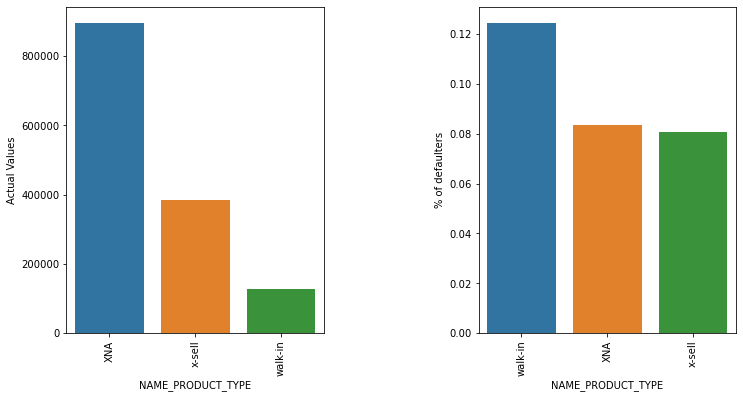

In [35]:
plot_Categorical_features('NAME_PRODUCT_TYPE')

It is observed that though Name_Product_type is not available for most of the customers, Percentage of defaulters are more where customers Name_Product_type is 'Walk-In'.

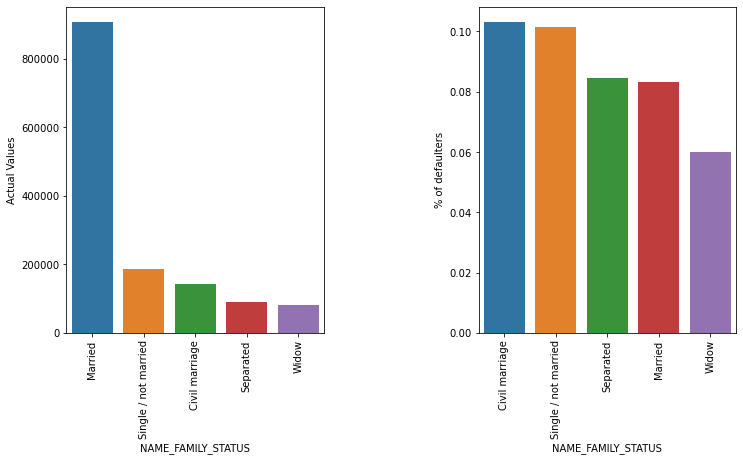

In [36]:
plot_Categorical_features('NAME_FAMILY_STATUS')

Based on Name_Family_Status, it is observed that data set contains more customers belonging to married status but number of defaulters are more in customers belonging to Civil marriage or not married.

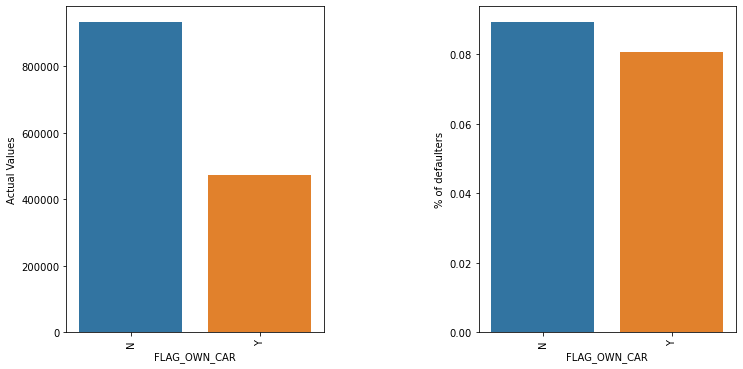

In [37]:
plot_Categorical_features('FLAG_OWN_CAR')

There is high chance that customer that doesn't own car can become a defaulter when compared to customer who owns a car.

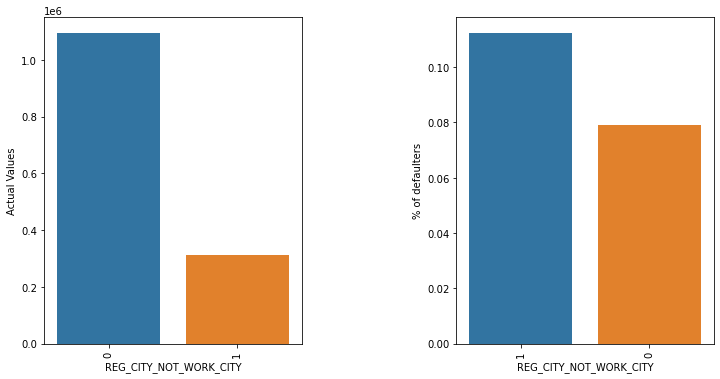

In [38]:
plot_Categorical_features('REG_CITY_NOT_WORK_CITY')

Customers who claim wrong work city have higher chances of becoming defaulter.

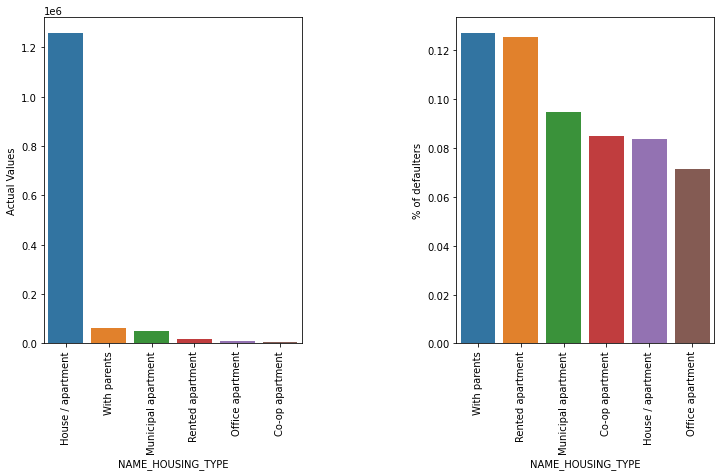

In [39]:
plot_Categorical_features('NAME_HOUSING_TYPE')

We have an imbalanced data with Name_Housing_Type. Customers living with parents or living in rented apartments have higher chances of defaulting.

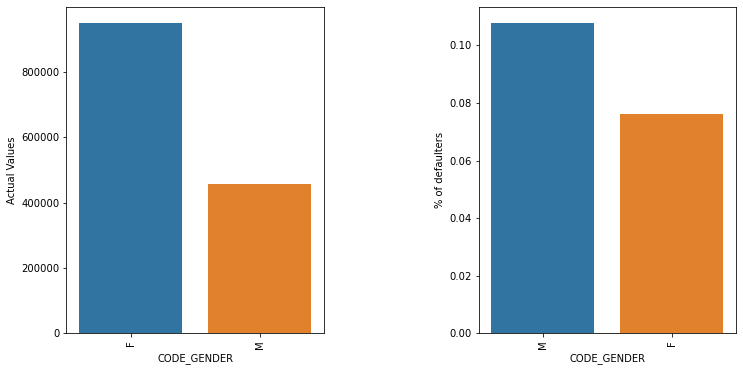

In [40]:
plot_Categorical_features('CODE_GENDER')

Male customers are more likely to be defaulter when compared to female customers.

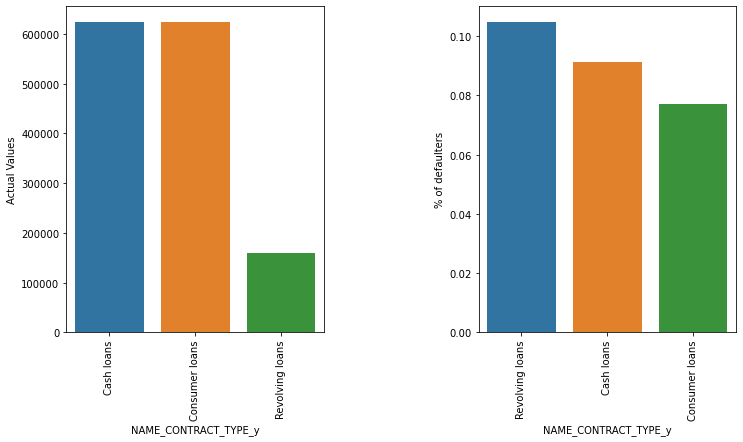

In [41]:
plot_Categorical_features('NAME_CONTRACT_TYPE_y')

Percentage of defaulters is high in customers whose contract type is Revolving loans.

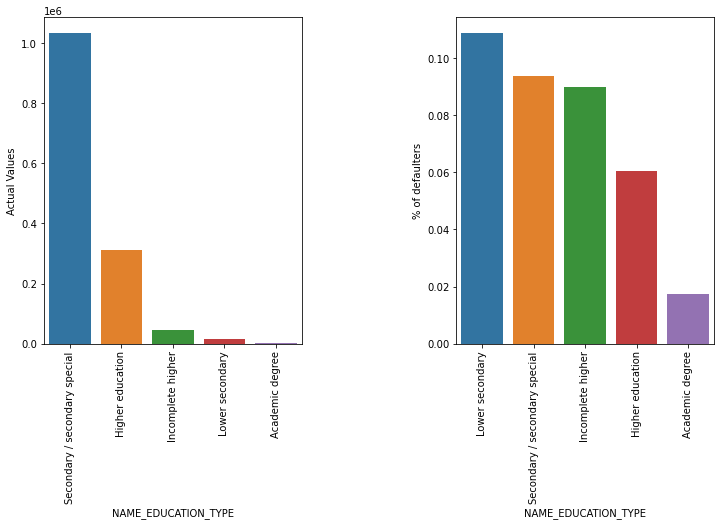

In [42]:
plot_Categorical_features('NAME_EDUCATION_TYPE')

1) Customers with lower education have high probability of becoming defaulters. <br>
2) Very imbalanced dataset with more customers having secondary education.

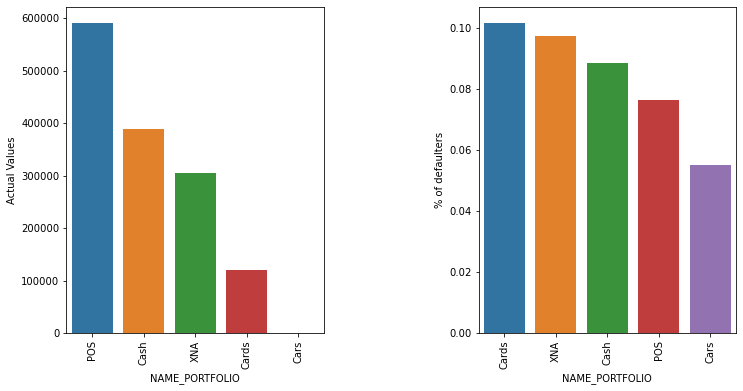

In [43]:
plot_Categorical_features('NAME_PORTFOLIO')

From the plot it is clear that the customers whose portfolio is not avaible have higher chances of defaulting along side customers with Cards portfolio.

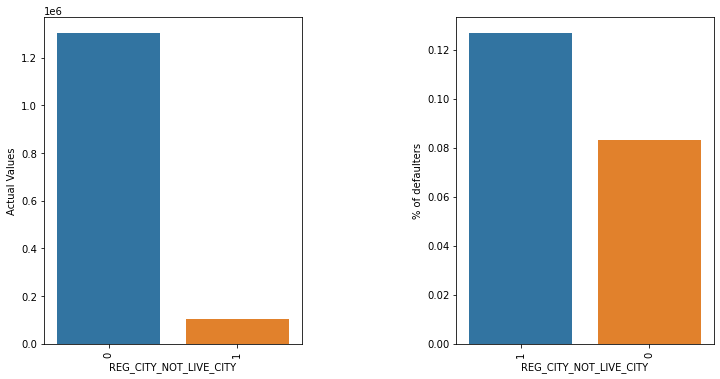

In [44]:
plot_Categorical_features('REG_CITY_NOT_LIVE_CITY')

Customers who claim wrong living city have higher chances of becoming defaulter.

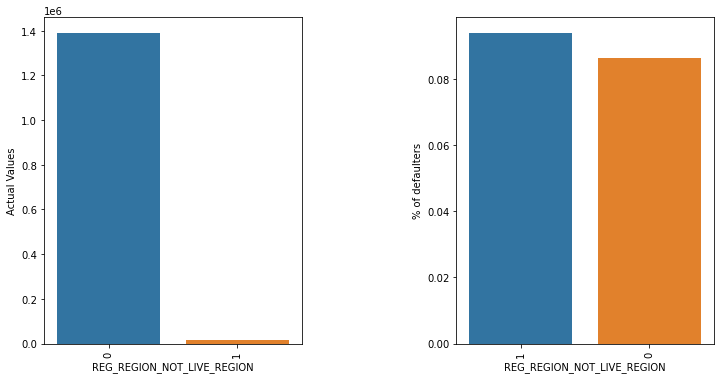

In [45]:
plot_Categorical_features('REG_REGION_NOT_LIVE_REGION')

Customers who claim wrong living region have higher chances of becoming defaulter.

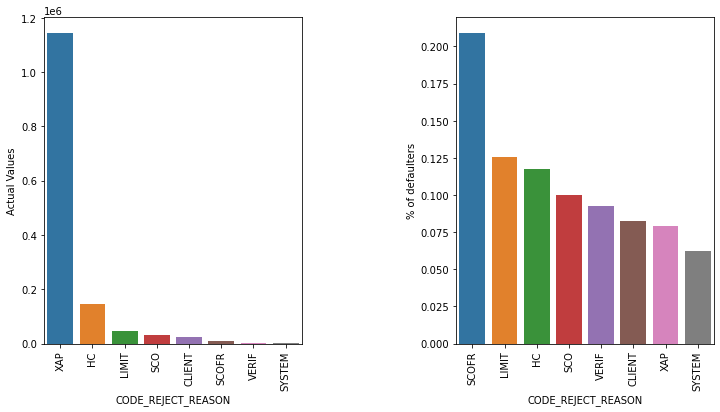

In [46]:
plot_Categorical_features('CODE_REJECT_REASON')

Customers whose previous application got rejected with SCOFR reason have high chances of becoming defaulters.

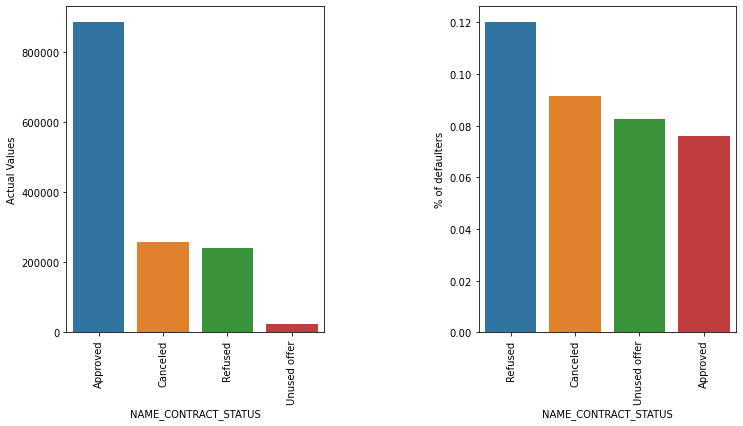

In [47]:
plot_Categorical_features('NAME_CONTRACT_STATUS')

1) Customers whose previous applications are rejected or cancelled have high chances of becoming defaulters. <br>
2) Customers whose previous applications are approved have better chances of becoming non-defaulters.

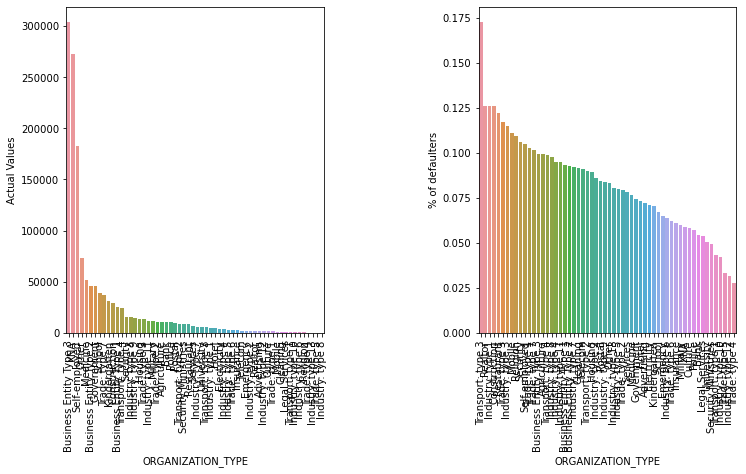

In [48]:
plot_Categorical_features('ORGANIZATION_TYPE')

Customers whose organization is of type 'Transport Type-3' have high probability of becoming defaulters.

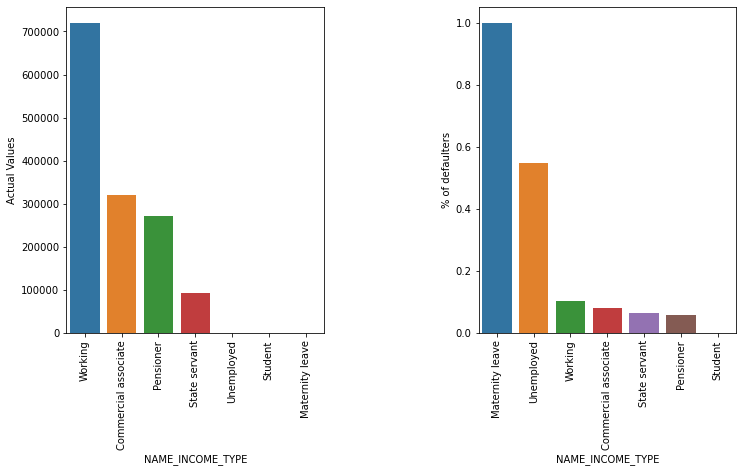

In [49]:
plot_Categorical_features('NAME_INCOME_TYPE')

1) Customers who are on maternity leave are defaulters. <br>
2) Customers who are unemployed have higher chances of becoming defaulters.

# Numerical Feature Analysis 

In [50]:
counts = X[numerical_variables].nunique()
print(counts)

EXT_SOURCE_3                     810
EXT_SOURCE_2                  117207
AMT_ANNUITY_y                 329145
DAYS_DECISION                   2922
AMT_CREDIT_x                    5496
SELLERPLACE_AREA                2077
OBS_30_CNT_SOCIAL_CIRCLE          33
AMT_REQ_CREDIT_BUREAU_YEAR        25
DAYS_EMPLOYED                  12451
DAYS_REGISTRATION              15607
DAYS_LAST_PHONE_CHANGE          3706
CNT_PAYMENT                       48
REGION_POPULATION_RELATIVE        81
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_DAY          8
AMT_INCOME_TOTAL                1875
AMT_REQ_CREDIT_BUREAU_MON         24
DAYS_BIRTH                     17448
CNT_CHILDREN                      15
AMT_REQ_CREDIT_BUREAU_QRT         10
HOUR_APPR_PROCESS_START_x         24
DAYS_ID_PUBLISH                 6161
HOUR_APPR_PROCESS_START_y         24
dtype: int64


In [51]:
for i in numerical_variables:
    print(X[i].head())
    print('-'*80)

0    0.139376
1    0.510090
2    0.510090
3    0.510090
4    0.729567
Name: EXT_SOURCE_3, dtype: float64
--------------------------------------------------------------------------------
0    0.262949
1    0.622246
2    0.622246
3    0.622246
4    0.555912
Name: EXT_SOURCE_2, dtype: float64
--------------------------------------------------------------------------------
0     9251.775
1    98356.995
2    64567.665
3     6737.310
4     5357.250
Name: AMT_ANNUITY_y, dtype: float64
--------------------------------------------------------------------------------
0    -606
1    -746
2    -828
3   -2341
4    -815
Name: DAYS_DECISION, dtype: int64
--------------------------------------------------------------------------------
0     406597.5
1    1293502.5
2    1293502.5
3    1293502.5
4     135000.0
Name: AMT_CREDIT_x, dtype: float64
--------------------------------------------------------------------------------
0     500
1      -1
2    1400
3     200
4      30
Name: SELLERPLACE_AREA, dtype:

From above results we can see that columns that represent Days have negative values which is in-correct. In below step we will convert negative days into positive years.

In [52]:
X['DAYS_BIRTH'] = X['DAYS_BIRTH'].apply(lambda x : round((-1.0)*x/365) if x < 0 else round(x/365) )

X['DAYS_EMPLOYED'] = X['DAYS_EMPLOYED'].apply(lambda x : round((-1.0)*x/365) if x < 0 else round(x/365) )

X['DAYS_REGISTRATION'] = X['DAYS_REGISTRATION'].apply(lambda x : round((-1.0)*x/365) if x < 0 else round(x/365) )

X['DAYS_ID_PUBLISH'] = X['DAYS_ID_PUBLISH'].apply(lambda x : round((-1.0)*x/365) if x < 0 else round(x/365) )

X['DAYS_LAST_PHONE_CHANGE'] = X['DAYS_LAST_PHONE_CHANGE'].apply(lambda x : round((-1.0)*x/365) if x < 0 else round(x/365) )

X['DAYS_DECISION'] = X['DAYS_DECISION'].apply(lambda x : round((-1.0)*x/365) if x < 0 else round(x/365) )


EXT_SOURCE_3


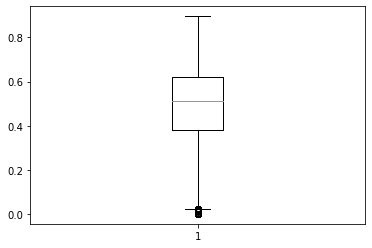

------------------------------------------------------------------------------------------------------------------------
EXT_SOURCE_2


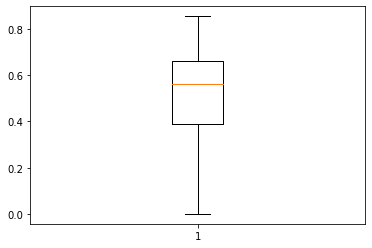

------------------------------------------------------------------------------------------------------------------------
AMT_ANNUITY_y


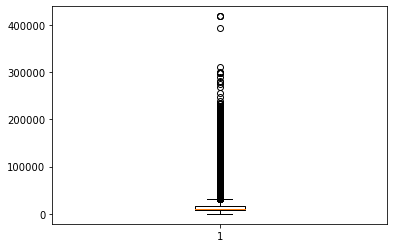

------------------------------------------------------------------------------------------------------------------------
DAYS_DECISION


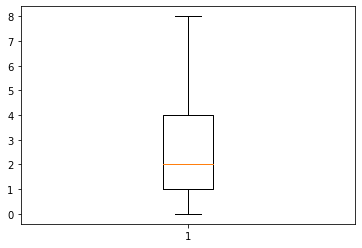

------------------------------------------------------------------------------------------------------------------------
AMT_CREDIT_x


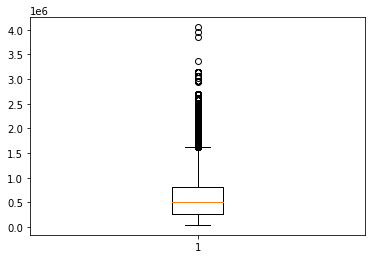

------------------------------------------------------------------------------------------------------------------------
SELLERPLACE_AREA


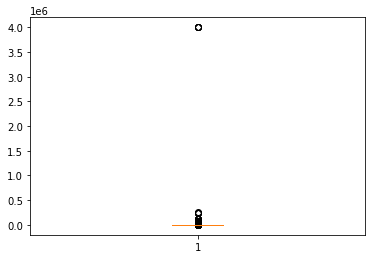

------------------------------------------------------------------------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE


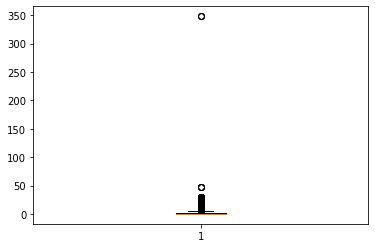

------------------------------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_YEAR


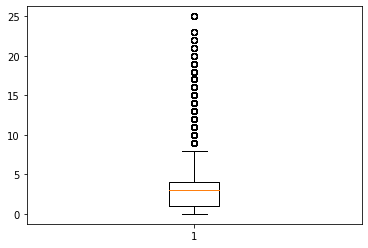

------------------------------------------------------------------------------------------------------------------------
DAYS_EMPLOYED


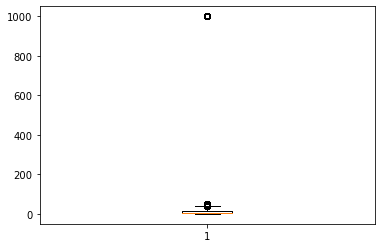

------------------------------------------------------------------------------------------------------------------------
DAYS_REGISTRATION


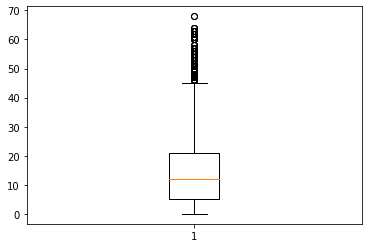

------------------------------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE


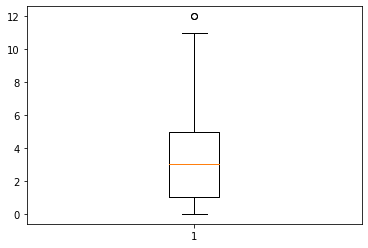

------------------------------------------------------------------------------------------------------------------------
CNT_PAYMENT


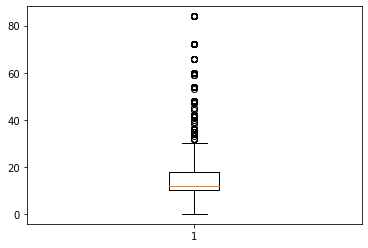

------------------------------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE


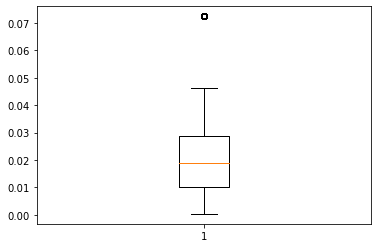

------------------------------------------------------------------------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE


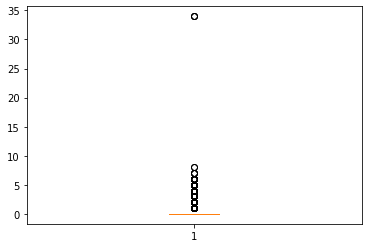

------------------------------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY


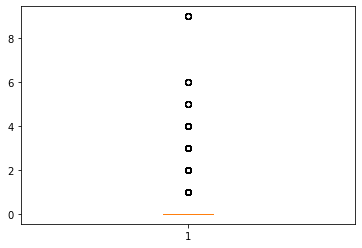

------------------------------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL


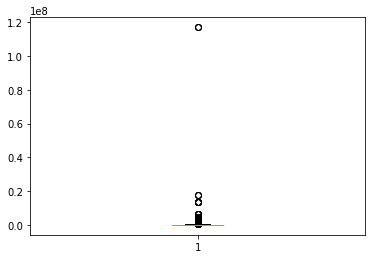

------------------------------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON


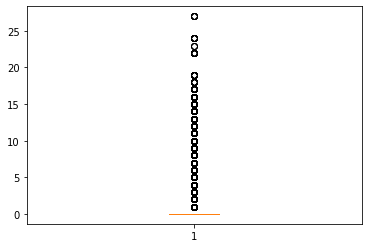

------------------------------------------------------------------------------------------------------------------------
DAYS_BIRTH


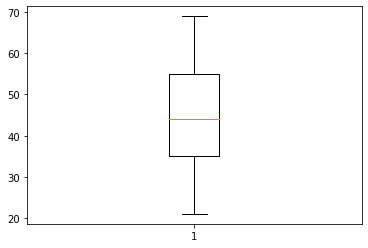

------------------------------------------------------------------------------------------------------------------------
CNT_CHILDREN


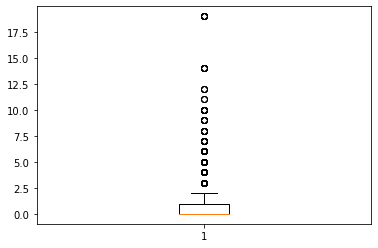

------------------------------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_QRT


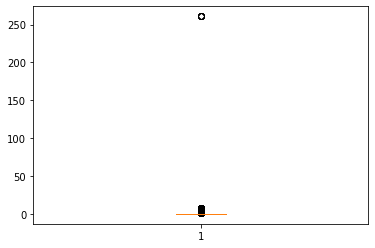

------------------------------------------------------------------------------------------------------------------------
HOUR_APPR_PROCESS_START_x


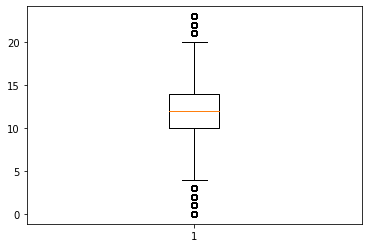

------------------------------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH


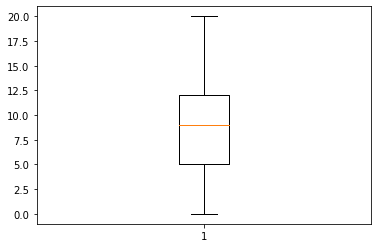

------------------------------------------------------------------------------------------------------------------------
HOUR_APPR_PROCESS_START_y


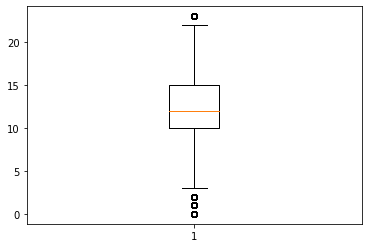

------------------------------------------------------------------------------------------------------------------------


In [53]:
for i in numerical_variables:
    print(i)
    plt.boxplot(X[i])
    plt.show()
    print('-'*120)

In [54]:
#deleting outliers
X=X.drop(X.loc[X['AMT_REQ_CREDIT_BUREAU_QRT'] > 50].index)
X=X.drop(X.loc[X['AMT_REQ_CREDIT_BUREAU_MON'] > 5].index)
X=X.drop(X.loc[X['CNT_PAYMENT'] > 35].index)
X=X.drop(X.loc[X['DAYS_REGISTRATION'] > 50].index)
X=X.drop(X.loc[X['DAYS_EMPLOYED'] > 40].index)
X=X.drop(X.loc[X['OBS_30_CNT_SOCIAL_CIRCLE'] > 40].index)
X=X.drop(X.loc[X['AMT_ANNUITY_y'] > 100000].index)
X=X.drop(X.loc[X['AMT_INCOME_TOTAL'] > 110000000].index)
X=X.drop(X.loc[X['DEF_30_CNT_SOCIAL_CIRCLE'] > 30].index)
X=X.drop(X.loc[X['SELLERPLACE_AREA'] > 50000].index)
X=X.drop(X.loc[X['AMT_CREDIT_x'] > 2000000].index)

In [55]:
X.shape

(1004098, 85)

In [56]:
def plot_numerical_features(feature):
    plt.figure(figsize=(10,6))
    plt.title("%s Distribution" % feature)
    sns.kdeplot(data=X, x=feature,hue ='TARGET')
    plt.show()   

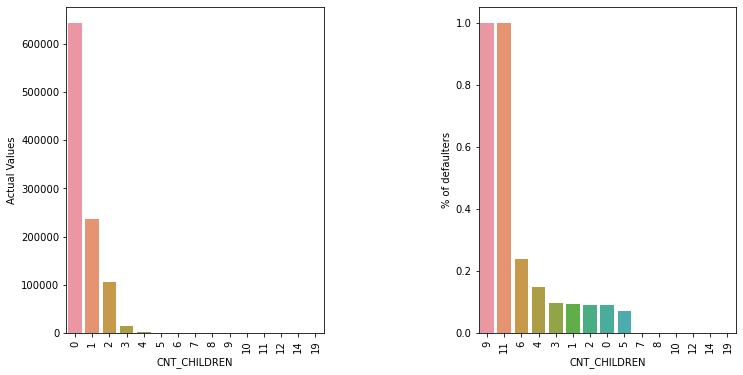

In [57]:
plot_Categorical_features('CNT_CHILDREN')

1) Though count of children is numerical, after analysing the data it can be considered as categorical. <br>
2) Customers with more children like have high probabilities of becoming defaulters than customers with minimum number of children.

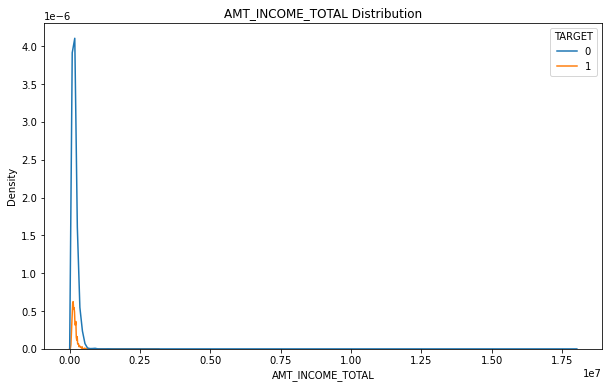

In [58]:
plot_numerical_features('AMT_INCOME_TOTAL')

Not much can be analysed from above density graph, let us create bins for amount income and plot categorical data to get insights

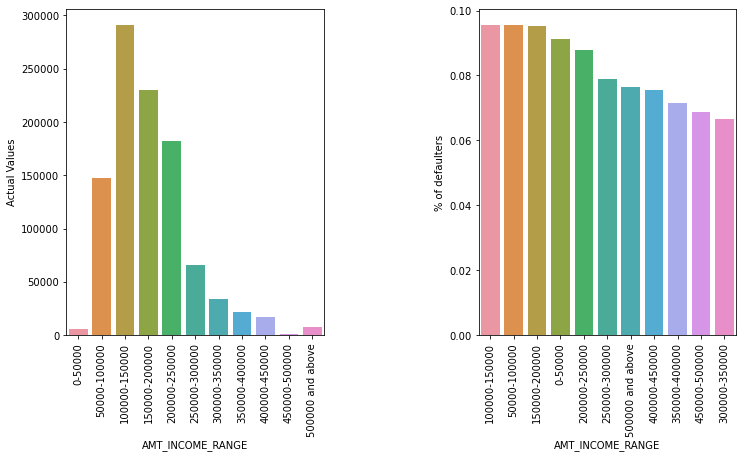

In [59]:
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
slot = ['0-50000','50000-100000','100000-150000', '150000-200000',
       '200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']

X['AMT_INCOME_RANGE']=pd.cut(X['AMT_INCOME_TOTAL'],bins,labels=slot)

plot_Categorical_features('AMT_INCOME_RANGE')

It can be inferred from above plot that customers belonging to lower income have high chances of defaulting that customers with medium or high income.

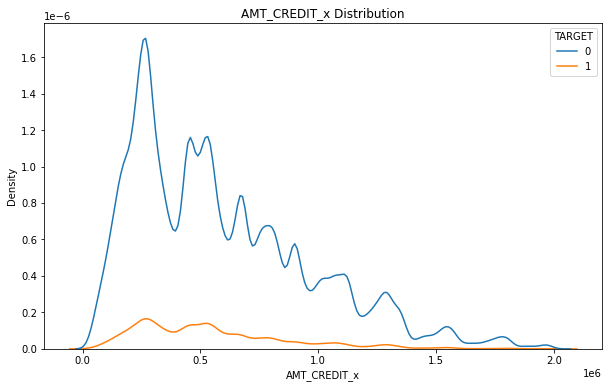

In [60]:
plot_numerical_features('AMT_CREDIT_x')

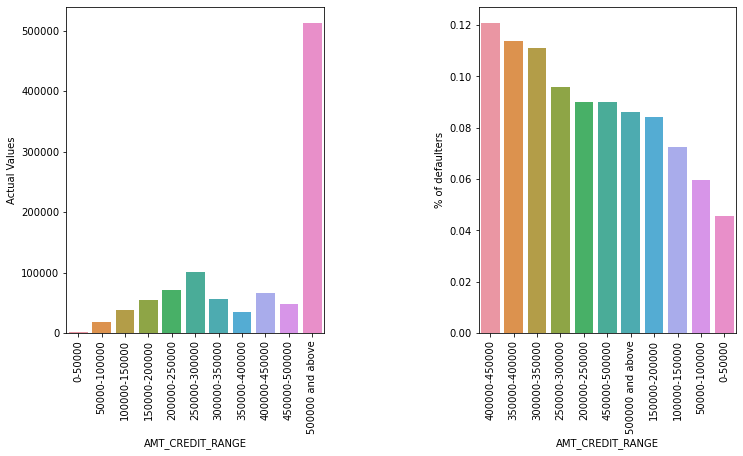

In [61]:
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
slot = ['0-50000','50000-100000','100000-150000', '150000-200000',
       '200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']

X['AMT_CREDIT_RANGE']=pd.cut(X['AMT_CREDIT_x'],bins,labels=slot)

plot_Categorical_features('AMT_CREDIT_RANGE')

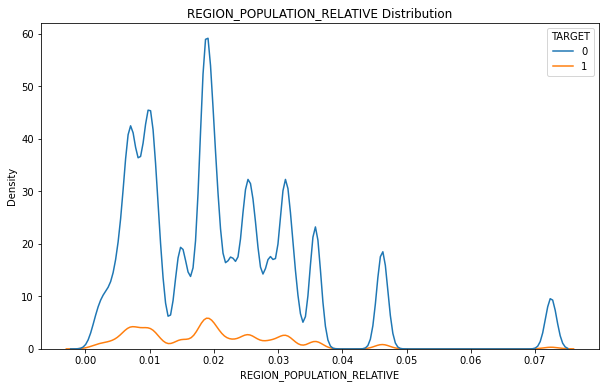

In [62]:
plot_numerical_features('REGION_POPULATION_RELATIVE')

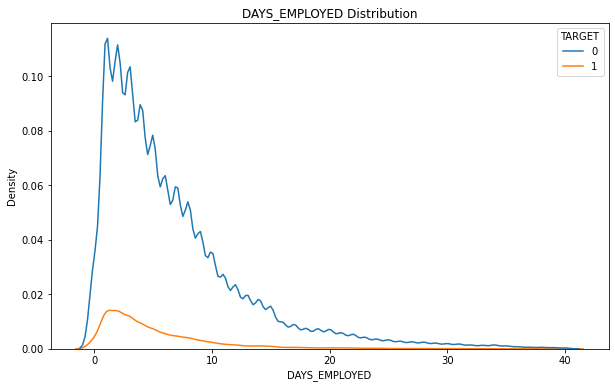

In [63]:
plot_numerical_features('DAYS_EMPLOYED')

From the plot we can see that density of defaulters is more where customers are employed around 2 to 5 years. 

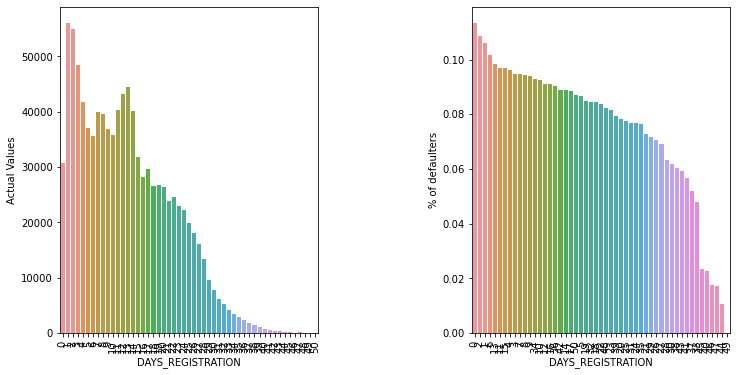

In [64]:
plot_Categorical_features('DAYS_REGISTRATION')

From the plot above we can conclude that customers who have changed their registration very near to application have high chances of becoming defaulters.

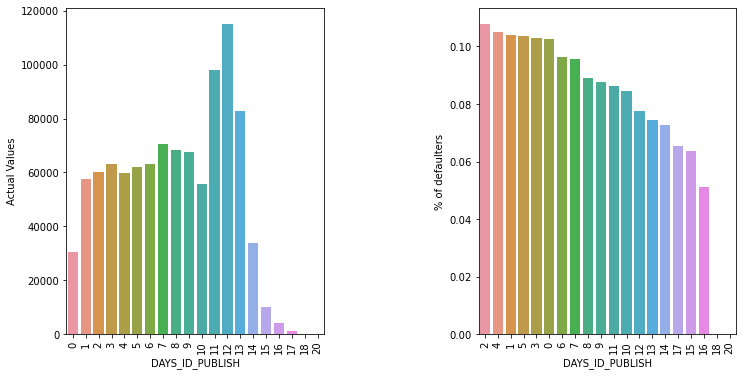

In [65]:
plot_Categorical_features('DAYS_ID_PUBLISH')

Customers who changed their identity document with which he applied for the loan very near to application date have high chances of becoming defaulters

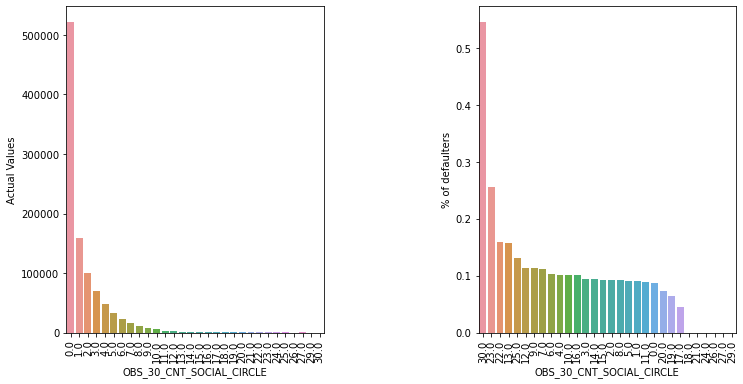

In [66]:
plot_Categorical_features('OBS_30_CNT_SOCIAL_CIRCLE')

As OBS_30_CNT_SOCIAL_CIRCLE value increase there is high chance that client will be classified as defaulter.

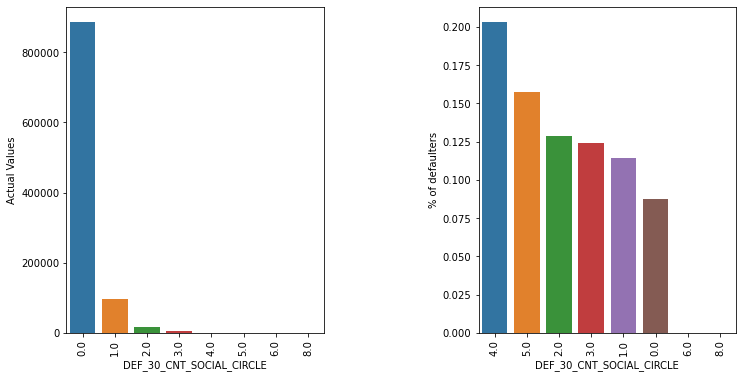

In [67]:
plot_Categorical_features('DEF_30_CNT_SOCIAL_CIRCLE')

As DEF_30_CNT_SOCIAL_CIRCLE value increase there is high chance that client will be classified as defaulter.

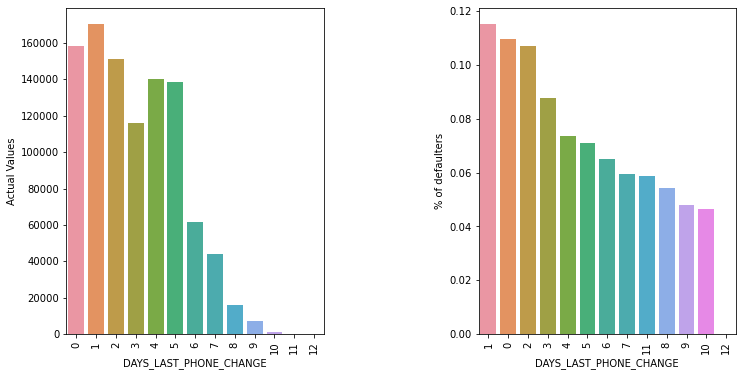

In [68]:
plot_Categorical_features('DAYS_LAST_PHONE_CHANGE')

As DAYS_LAST_PHONE_CHANGE is low i.e. last phone changed is very closed to application date then there is high chance that customer can turn to be defaulter.

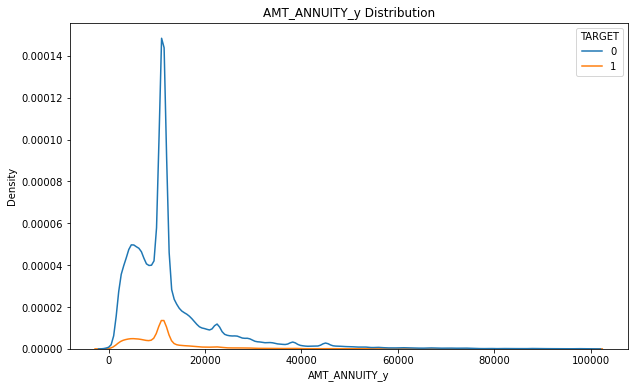

In [69]:
plot_numerical_features('AMT_ANNUITY_y')

# Bi-Variate Analysis

In [70]:
def bivariate(feature1,feature2):
    plt.figure(figsize=(10,6))
    plt.title(feature1 + ' vs ' + feature2)
    sns.barplot(x=feature1,y=feature2,data=X,hue ='TARGET')
    plt.show()

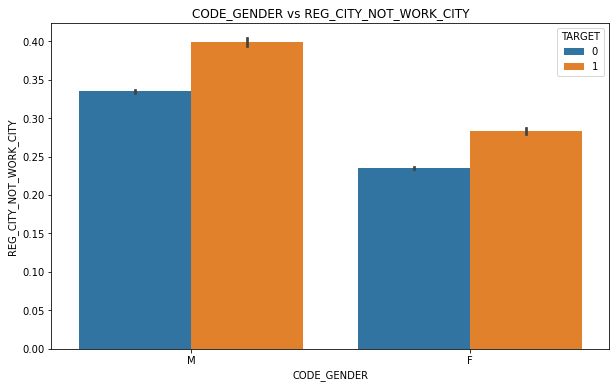

In [71]:
bivariate('CODE_GENDER','REG_CITY_NOT_WORK_CITY')

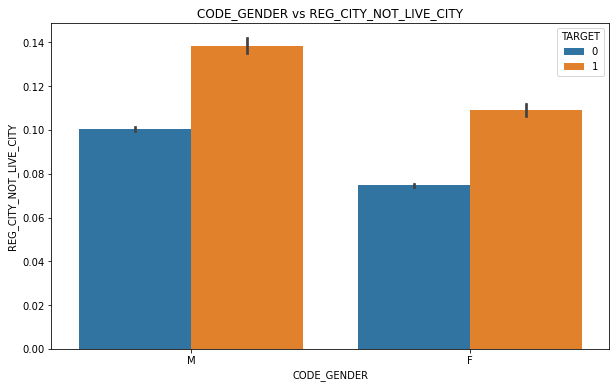

In [72]:
bivariate('CODE_GENDER','REG_CITY_NOT_LIVE_CITY')

Male customers who provide wrong living & working city have higher chances of defaulting.

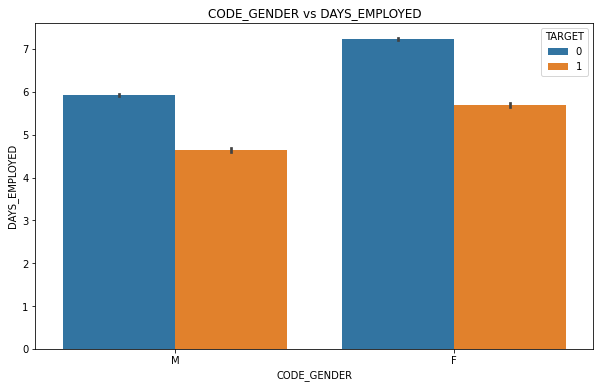

In [73]:
bivariate('CODE_GENDER','DAYS_EMPLOYED')

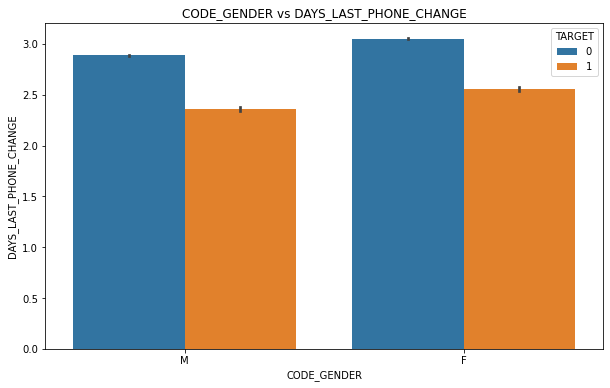

In [74]:
bivariate('CODE_GENDER','DAYS_LAST_PHONE_CHANGE')

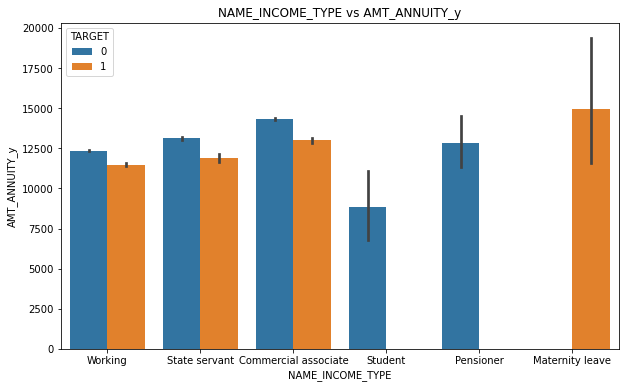

In [75]:
bivariate('NAME_INCOME_TYPE','AMT_ANNUITY_y')

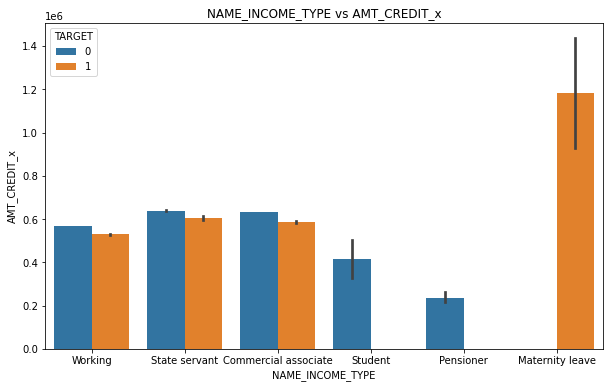

In [76]:
bivariate('NAME_INCOME_TYPE','AMT_CREDIT_x')

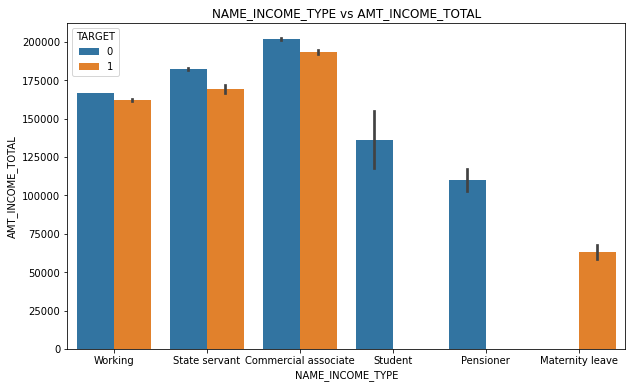

In [77]:
bivariate('NAME_INCOME_TYPE','AMT_INCOME_TOTAL')

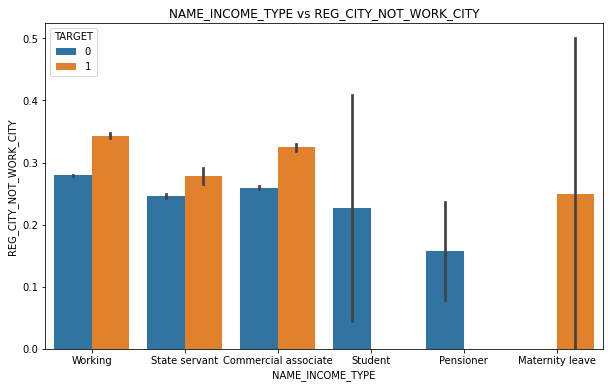

In [78]:
bivariate('NAME_INCOME_TYPE','REG_CITY_NOT_WORK_CITY')

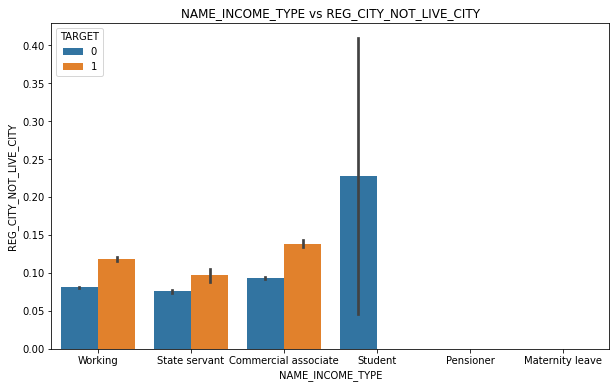

In [79]:
bivariate('NAME_INCOME_TYPE','REG_CITY_NOT_LIVE_CITY')

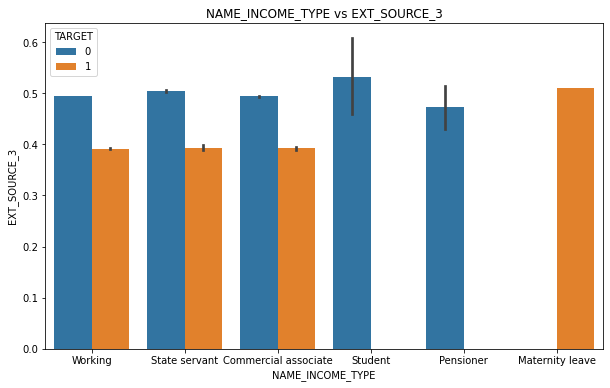

In [80]:
bivariate('NAME_INCOME_TYPE','EXT_SOURCE_3')

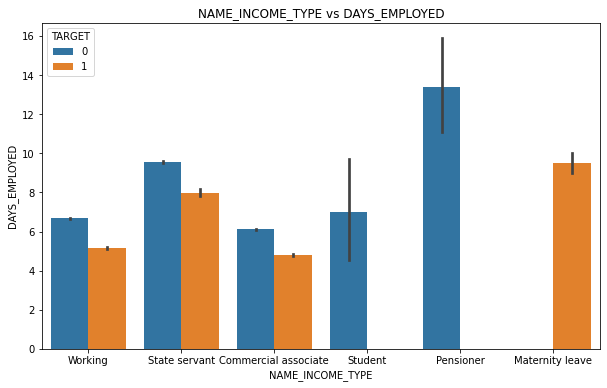

In [81]:
bivariate('NAME_INCOME_TYPE','DAYS_EMPLOYED')

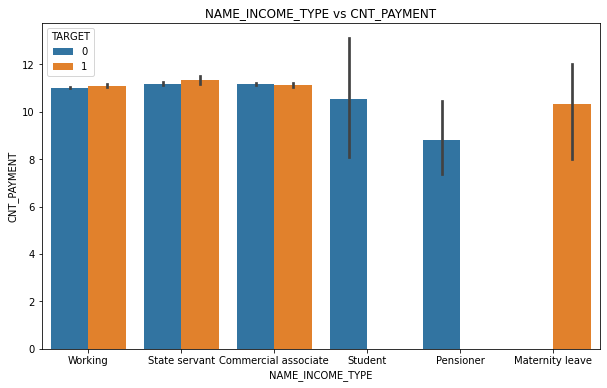

In [82]:
bivariate('NAME_INCOME_TYPE','CNT_PAYMENT')

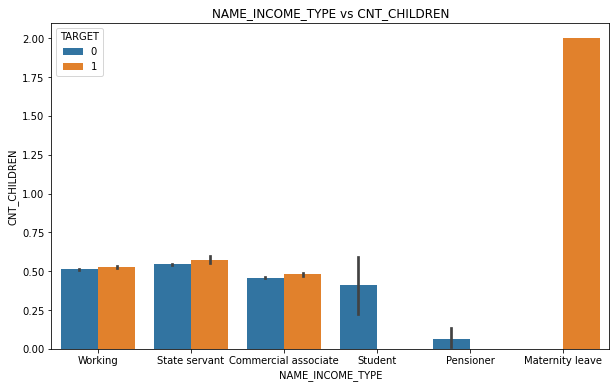

In [83]:
bivariate('NAME_INCOME_TYPE','CNT_CHILDREN')

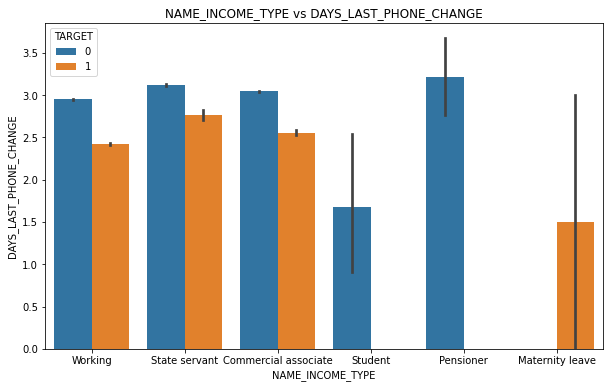

In [84]:
bivariate('NAME_INCOME_TYPE','DAYS_LAST_PHONE_CHANGE')

Customeres with Name_Income_Type = 'Maternity Leave' are defaulters.

# Conclusion

01) Application Data has 307511 rows and 122 columns. <br>
02) Previous application data has 1670214 rows and 37 columns. <br>
03) application data and previous application data can be merged using column 'SK_ID_CURR'. <br>
04) It is observed that though Name_Product_type is not available for most of the customers, Percentage of defaulters are more where customers Name_Product_type is 'Walk-In'. <br>
05) Based on Name_Family_Status, it is observed that data set contains more customers belonging to married status but number of defaulters are more in customers belonging to Civil marriage or not married. <br>
06) There is high chance that customer that doesn't own car can become a defaulter when compared to customer who owns a car. <br>
07) Customers who claim wrong work city have higher chances of becoming defaulter. <br>
08) We have an imbalanced data with Name_Housing_Type. Customers living with parents or living in rented apartments have higher chances of defaulting. <br>
09) Male customers are more likely to be defaulter when compared to female customers. <br>
10) Percentage of defaulters is high in customers whose contract type is Revolving loans. <br>
11) Customers with lower education have high probability of becoming defaulters. <br>
12) Very imbalanced dataset with more customers having secondary education.<br>
13) From the plot it is clear that the customers whose portfolio is not avaible have higher chances of defaulting along side customers with Cards portfolio.<br>
14) Customers who claim wrong living city have higher chances of becoming defaulter. <br>
15) Customers who claim wrong living region have higher chances of becoming defaulter.<br>
16) Customers whose previous application got rejected with SCOFR reason have high chances of becoming defaulters.<br>
17) Customers whose previous applications are rejected or cancelled have high chances of becoming defaulters. <br>
18) Customers whose previous applications are approved have better chances of becoming non-defaulters. <br>
19) Customers whose organization is of type 'Transport Type-3' have high probability of becoming defaulters.<br>
20) Customers who are on maternity leave are defaulters. <br>
21) Customers who are unemployed have higher chances of becoming defaulters. <br>
22) It can be inferred from above plot that customers belonging to lower income have high chances of defaulting that customers with medium or high income. <br>
23) It can be inferred from above plot that customers belonging to lower income have high chances of defaulting that customers with medium or high income. <br>
24) As DAYS_LAST_PHONE_CHANGE is low i.e. last phone changed is very closed to application date then there is high chance that customer can turn to be defaulter.